In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk

print('import successful')

import successful


Import image

In [2]:
data_dir = 'data//CTChest.nii.gz'
img = sitk.ReadImage(data_dir)

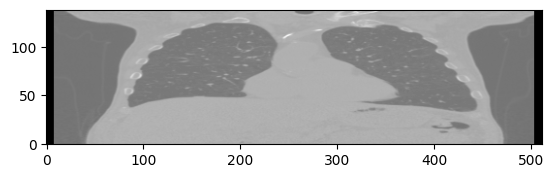

In [3]:
imnp = sitk.GetArrayFromImage(img)
cor_slc = 190
plt.imshow(imnp[:,cor_slc,:], cmap = 'gray', origin = 'lower')

Image Resampling

In [4]:
resample = sitk.ResampleImageFilter()

k = np.divide([1,1,1], img.GetSpacing())

resample_size_float = np.divide(img.GetSize(), k)
resample_spacing_float = np.multiply(img.GetSpacing(), k)

resample_size = []
resample_spacing = [1,1,1]

for idx, dim in enumerate(resample_size_float):
    resample_size.append(int(dim))

resample = sitk.ResampleImageFilter()
resample.SetOutputOrigin(img.GetOrigin())
resample.SetSize(resample_size)
resample.SetOutputSpacing(resample_spacing)
resample.SetOutputDirection(img.GetDirection())
resample.SetInterpolator(sitk.sitkLinear)

img_resampled = resample.Execute(img)

Multiview Function

In [5]:
def multiview(im, slice_inds, min_i = -100, max_i = 100):
    fig, ax = plt.subplots(1,3, figsize = (12,4))
    # Convert SimpleITK image to Numpy Array
    npim = sitk.GetArrayFromImage(im)
    # Display each slice
    ax[0].imshow(npim[:,:,slice_inds[0]], cmap = 'gray', origin = 'lower')
    # Sagittal slice
    ax[1].imshow(npim[:,slice_inds[1],:], cmap = 'gray', origin = 'lower')
    # Coronal slice
    ax[2].imshow(npim[slice_inds[2],:,:], cmap = 'gray') # Axial slice
    # Add title to each view
    planes = ["Sagittal", "Coronal", "Axial"]
    for i,p in enumerate(planes):
        ax[i].set_title(p)

Image (0x44cf280)
  RTTI typeinfo:   itk::Image<int, 3u>
  Reference Count: 1
  Modified Time: 1888
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1873
  UpdateMTime: 1887
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [390, 390, 347]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [390, 390, 347]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [390, 390, 347]
  Spacing: [1, 1, 1]
  Origin: [-195, -171.7, -347.75]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x46dcfb0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, int>
      Reference Count: 1
      Modified Time: 1884
      Debug: Off

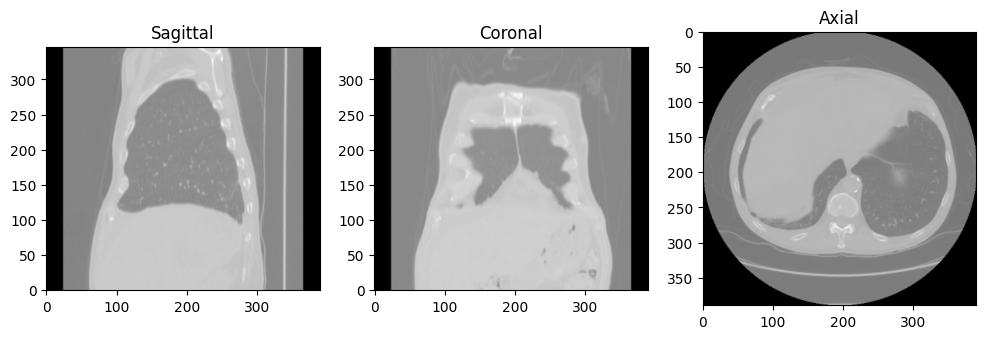

In [6]:
multiview(img_resampled, [100,100,100])
print(img_resampled)

Targeting nodule at (387 235 71)

Slicer spacing is .7617, .7617, 2.5
Slicer size is 512, 512, 139

my spacing is 1,1,1
my size is 390, 390, 347

so...

In [7]:
def convert_slicer_coordinates(img, coords):
    spacing_conversion = np.divide(img_resampled.GetSpacing(), [.7617, .7617, 2.5])
    size_conversion = np.divide(img_resampled.GetSize(), [512, 512, 139])
    
    slicer_coords = coords
    python_coords_dbl = np.multiply(slicer_coords, size_conversion)
    
    python_coords = []
    for coord in python_coords_dbl:
        python_coords.append(int(coord))
    
    return python_coords

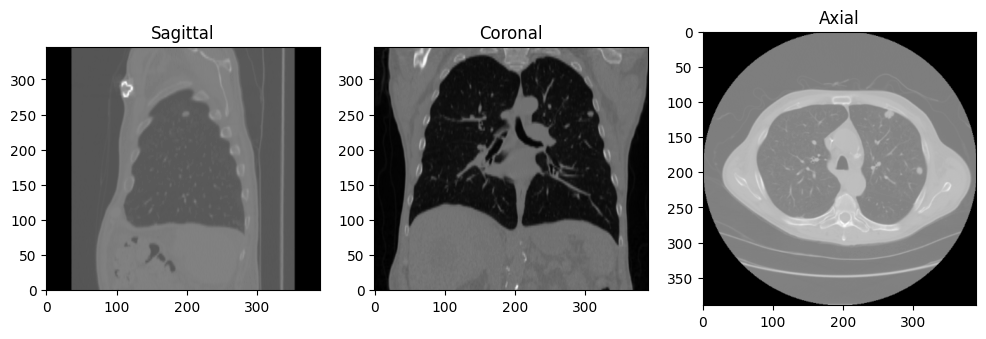

In [8]:
# view tumor on the right
multiview(img_resampled, convert_slicer_coordinates(img_resampled, [405, 262, 100]))

Reduce image around centroid marked

In [13]:
centroid = [100, 262, 405] # axial, sagittal, coronal
img_window_size_sc = 200
img_window_size_a = 200


np_img = sitk.GetArrayFromImage(img_resampled)
np_roi = np_img[centroid[0]-img_window_size_a:centroid[0]+img_window_size_a, centroid[1]-img_window_size_sc:centroid[1]+img_window_size_sc,
                centroid[2]-img_window_size_sc:centroid[2]+img_window_size_sc]

# np_roi = np_img[100:140, 140:160, 140:170]
img_roi = sitk.GetImageFromArray(np_roi)
img_roi.GetSize()

(185, 328, 53)

[92, 164, 26]


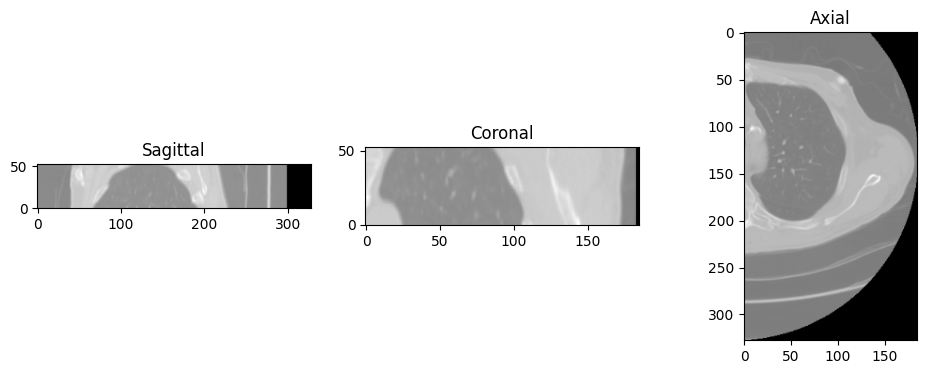

In [15]:
center_dbl = np.divide(img_roi.GetSize(), 2)
center = []
for dim in center_dbl:
    center.append(int(dim))

print(center)

multiview(img_roi, [center[0], center[1], center[2]])